<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session9/blob/main/EVA1_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


# Import files from Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/ERA 1/Assignment-9')

# Net is class for model

In [6]:
import model_cifar10
from model_cifar10 import Net

# Import Other fuctions

In [7]:
import utility
import model_transpose
import train_test

from train_test import train, test, train_test_model
from utility import load_data, set_albumen_params, display_incorrect_pred
from model_transpose import cifar_ds10, tl_ts_mod

# Assign device

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [9]:
view_model = Net().to(device)
summary(view_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 32, 15, 15]          18,464
       BatchNorm2d-9           [-1, 32, 15, 15]              64
             ReLU-10           [-1, 32, 15, 15]               0
           Conv2d-11           [-1, 64, 15, 15]          18,432
      BatchNorm2d-12           [-1, 64, 15, 15]             128
             ReLU-13           [-1, 64, 15, 15]               0
        Dropout2d-14           [-1, 64,

# Train & Test Model

In [10]:
trl, trs = load_data()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mean = list(np.round(trs.data.mean(axis=(0,1,2))/255, 4))
std = list(np.round(trs.data.std(axis=(0,1,2))/255,4))

transform_train, transform_valid = set_albumen_params(mean, std)
trainset_mod, trainloader_mod, testset_mod, testloader_mod = tl_ts_mod(transform_train,transform_valid)

model = Net(dropout=0.02, normalization='BN').to(device)
net_ret, wrong_prediction_list, train_losses, train_acc, test_losses, test_acc = train_test_model(model, trainloader_mod, testloader_mod, 'BN', 300, 0.005, device )


100%|██████████| 170498071/170498071 [00:03<00:00, 56488361.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


100%|██████████| 391/391 [00:12<00:00, 32.30it/s]


Average Training Loss=1.729745679473877, Accuracy=35.87


Test set: Average loss: 1.3942, Accuracy: 4952/10000 (49.52%)

EPOCH: 2


100%|██████████| 391/391 [00:13<00:00, 29.65it/s]


Average Training Loss=1.4332112944030762, Accuracy=47.844


Test set: Average loss: 1.2497, Accuracy: 5370/10000 (53.70%)

EPOCH: 3


100%|██████████| 391/391 [00:10<00:00, 36.81it/s]


Average Training Loss=1.2671449237060546, Accuracy=54.492


Test set: Average loss: 1.1169, Accuracy: 6050/10000 (60.50%)

EPOCH: 4


100%|██████████| 391/391 [00:09<00:00, 40.62it/s]


Average Training Loss=1.1357120651245116, Accuracy=59.378


Test set: Average loss: 0.9065, Accuracy: 6795/10000 (67.95%)

EPOCH: 5


100%|██████████| 391/391 [00:10<00:00, 36.56it/s]


Average Training Loss=1.0311584867858887, Accuracy=63.4


Test set: Average loss: 0.8412, Accuracy: 7107/10000 (71.07%)

EPOCH: 6


100%|██████████| 391/391 [00:11<00:00, 34.43it/s]


Average Training Loss=0.9519388993835449, Accuracy=66.5


Test set: Average loss: 0.8994, Accuracy: 6938/10000 (69.38%)

EPOCH: 7


100%|██████████| 391/391 [00:11<00:00, 34.09it/s]


Average Training Loss=0.9069315928649903, Accuracy=68.114


Test set: Average loss: 0.8417, Accuracy: 7114/10000 (71.14%)

EPOCH: 8


100%|██████████| 391/391 [00:11<00:00, 34.30it/s]


Average Training Loss=0.8541571084594727, Accuracy=70.034


Test set: Average loss: 0.7149, Accuracy: 7545/10000 (75.45%)

EPOCH: 9


100%|██████████| 391/391 [00:10<00:00, 36.27it/s]


Average Training Loss=0.8156413884735108, Accuracy=71.382


Test set: Average loss: 0.6532, Accuracy: 7721/10000 (77.21%)

EPOCH: 10


100%|██████████| 391/391 [00:09<00:00, 40.22it/s]


Average Training Loss=0.7851306144714355, Accuracy=72.7


Test set: Average loss: 0.6206, Accuracy: 7912/10000 (79.12%)

EPOCH: 11


100%|██████████| 391/391 [00:10<00:00, 37.19it/s]


Average Training Loss=0.7583408990478515, Accuracy=73.368


Test set: Average loss: 0.6168, Accuracy: 7881/10000 (78.81%)

EPOCH: 12


100%|██████████| 391/391 [00:11<00:00, 33.93it/s]


Average Training Loss=0.7343914985656739, Accuracy=74.256


Test set: Average loss: 0.5643, Accuracy: 8082/10000 (80.82%)

EPOCH: 13


100%|██████████| 391/391 [00:11<00:00, 34.24it/s]


Average Training Loss=0.7175721133422852, Accuracy=74.634


Test set: Average loss: 0.6109, Accuracy: 7950/10000 (79.50%)

EPOCH: 14


100%|██████████| 391/391 [00:11<00:00, 34.19it/s]


Average Training Loss=0.6938997005462646, Accuracy=75.76


Test set: Average loss: 0.5733, Accuracy: 8069/10000 (80.69%)

EPOCH: 15


100%|██████████| 391/391 [00:11<00:00, 35.42it/s]


Average Training Loss=0.6720427330780029, Accuracy=76.514


Test set: Average loss: 0.6742, Accuracy: 7770/10000 (77.70%)

EPOCH: 16


100%|██████████| 391/391 [00:09<00:00, 39.41it/s]


Average Training Loss=0.6641708842468261, Accuracy=76.69


Test set: Average loss: 0.5221, Accuracy: 8235/10000 (82.35%)

EPOCH: 17


100%|██████████| 391/391 [00:10<00:00, 37.30it/s]


Average Training Loss=0.6481935907745361, Accuracy=77.35


Test set: Average loss: 0.5346, Accuracy: 8164/10000 (81.64%)

EPOCH: 18


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]


Average Training Loss=0.6377778433227539, Accuracy=77.782


Test set: Average loss: 0.5341, Accuracy: 8184/10000 (81.84%)

EPOCH: 19


100%|██████████| 391/391 [00:13<00:00, 29.54it/s]


Average Training Loss=0.6225774926757812, Accuracy=78.346


Test set: Average loss: 0.5259, Accuracy: 8186/10000 (81.86%)

EPOCH: 20


100%|██████████| 391/391 [00:11<00:00, 33.67it/s]


Average Training Loss=0.6040264060974121, Accuracy=78.78


Test set: Average loss: 0.5205, Accuracy: 8209/10000 (82.09%)

EPOCH: 21


100%|██████████| 391/391 [00:11<00:00, 34.30it/s]


Average Training Loss=0.5970676123809815, Accuracy=79.246


Test set: Average loss: 0.4936, Accuracy: 8300/10000 (83.00%)

EPOCH: 22


100%|██████████| 391/391 [00:11<00:00, 34.25it/s]


Average Training Loss=0.5907278134918212, Accuracy=79.598


Test set: Average loss: 0.4805, Accuracy: 8380/10000 (83.80%)

EPOCH: 23


100%|██████████| 391/391 [00:10<00:00, 37.57it/s]


Average Training Loss=0.5748118614959716, Accuracy=80.012


Test set: Average loss: 0.5465, Accuracy: 8181/10000 (81.81%)

EPOCH: 24


100%|██████████| 391/391 [00:09<00:00, 39.36it/s]


Average Training Loss=0.5722178574371338, Accuracy=80.106


Test set: Average loss: 0.4871, Accuracy: 8321/10000 (83.21%)

EPOCH: 25


100%|██████████| 391/391 [00:11<00:00, 35.34it/s]


Average Training Loss=0.5585407469940186, Accuracy=80.342


Test set: Average loss: 0.5026, Accuracy: 8326/10000 (83.26%)

EPOCH: 26


100%|██████████| 391/391 [00:11<00:00, 33.94it/s]


Average Training Loss=0.557525984954834, Accuracy=80.578


Test set: Average loss: 0.4832, Accuracy: 8386/10000 (83.86%)

EPOCH: 27


100%|██████████| 391/391 [00:11<00:00, 33.77it/s]


Average Training Loss=0.5468804173278808, Accuracy=80.82


Test set: Average loss: 0.4943, Accuracy: 8344/10000 (83.44%)

EPOCH: 28


100%|██████████| 391/391 [00:11<00:00, 34.14it/s]


Average Training Loss=0.542362430267334, Accuracy=81.106


Test set: Average loss: 0.4729, Accuracy: 8426/10000 (84.26%)

EPOCH: 29


100%|██████████| 391/391 [00:11<00:00, 34.59it/s]


Average Training Loss=0.5411759132385254, Accuracy=81.212


Test set: Average loss: 0.4833, Accuracy: 8393/10000 (83.93%)

EPOCH: 30


100%|██████████| 391/391 [00:09<00:00, 39.19it/s]


Average Training Loss=0.5265054421234131, Accuracy=81.534


Test set: Average loss: 0.4497, Accuracy: 8467/10000 (84.67%)

EPOCH: 31


100%|██████████| 391/391 [00:10<00:00, 37.63it/s]


Average Training Loss=0.5235450824737549, Accuracy=81.746


Test set: Average loss: 0.4436, Accuracy: 8497/10000 (84.97%)

EPOCH: 32


100%|██████████| 391/391 [00:11<00:00, 34.73it/s]


Average Training Loss=0.5146338864898682, Accuracy=82.104


Test set: Average loss: 0.4659, Accuracy: 8434/10000 (84.34%)

EPOCH: 33


100%|██████████| 391/391 [00:11<00:00, 34.37it/s]


Average Training Loss=0.5080523711395264, Accuracy=82.224


Test set: Average loss: 0.4518, Accuracy: 8470/10000 (84.70%)

EPOCH: 34


100%|██████████| 391/391 [00:11<00:00, 34.00it/s]


Average Training Loss=0.5045963460540771, Accuracy=82.39


Test set: Average loss: 0.4478, Accuracy: 8501/10000 (85.01%)

Total Number of incorrectly predicted images by model type BN is 1499


# Display Validation Accuracy & Loss

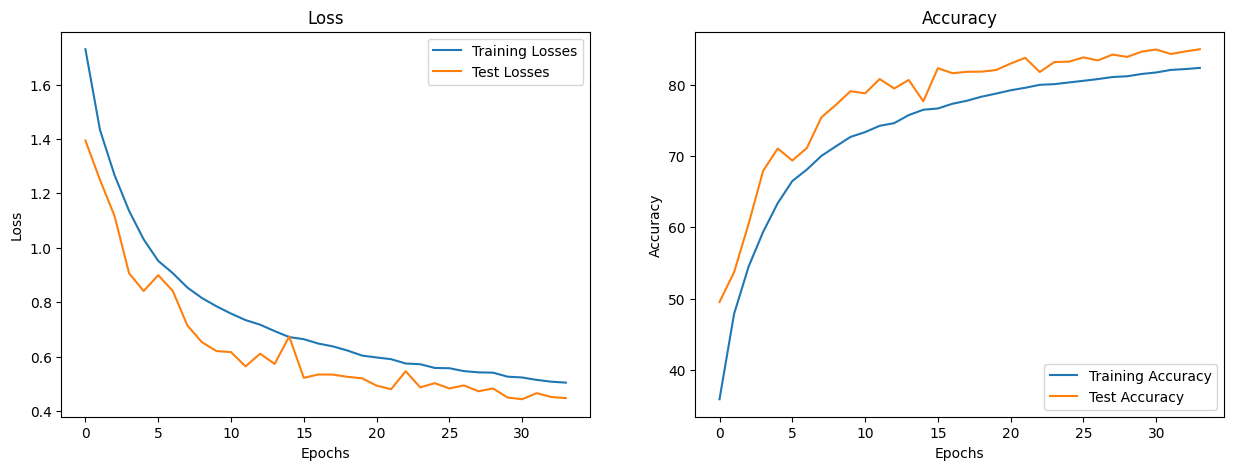

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(train_losses, label='Training Losses')
axs[0].plot(test_losses, label='Test Losses')
axs[0].legend(loc='upper right')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title("Loss")

axs[1].plot(train_acc, label='Training Accuracy')
axs[1].plot(test_acc, label='Test Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title("Accuracy")

plt.show()

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net_ret.eval()
with torch.no_grad():
    for data in testloader_mod:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net_ret(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 79 %
Accuracy of   car : 92 %
Accuracy of  bird : 72 %
Accuracy of   cat : 73 %
Accuracy of  deer : 85 %
Accuracy of   dog : 72 %
Accuracy of  frog : 88 %
Accuracy of horse : 84 %
Accuracy of  ship : 90 %
Accuracy of truck : 94 %


# Display wrong prediction

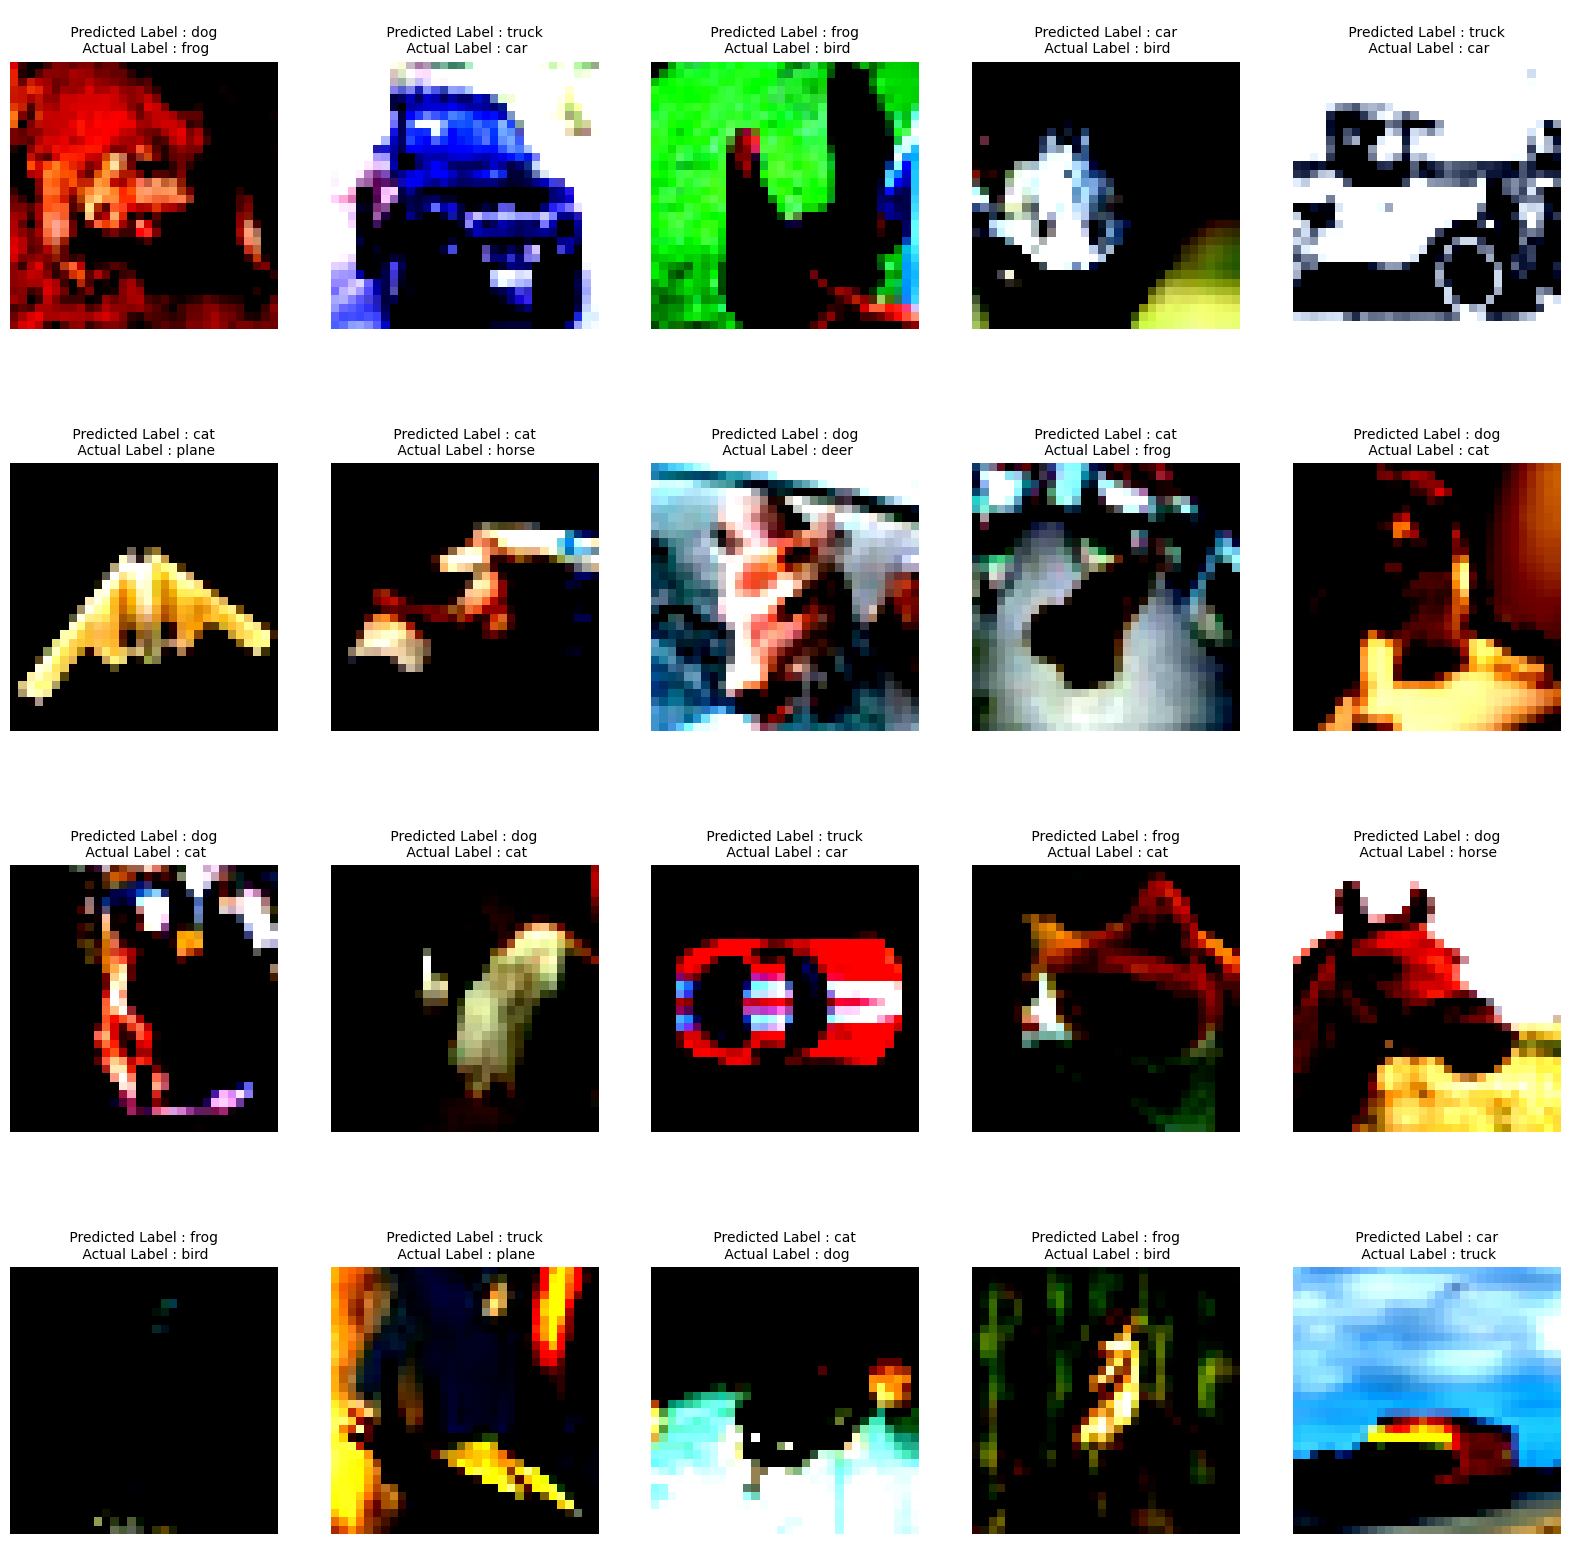

In [17]:
display_incorrect_pred(wrong_prediction_list)